In [1]:
from SimDLL import SimDLL
from SimDLL import plot_data_from_map, plot_combined_from_map
import ctypes
import numpy as np

ModuleNotFoundError: No module named 'SimDLL'

In [2]:

step_size = 1/24e3  # timestep
duration = 2.0  # 2 second simulation
num_steps = int(duration /step_size)
time_array = np.linspace(0, duration, num_steps, endpoint=False)


dll_path = "./IBR_1GFM_1GFL.dll"
class inputStruct(ctypes.Structure):
    _fields_ = [("param", ctypes.c_float*2),
                ("cmd", ctypes.c_float*4)]
class outputStruct(ctypes.Structure):
    _fields_ = [("out_gfm", ctypes.c_double * 20),
                ("out_gfl", ctypes.c_double * 20)]
    


inverter = SimDLL(dll_path, inputStruct = inputStruct, outputStruct = outputStruct, dt = step_size)


inputs = {
    'param': [1.0, 10.0],
    'cmd': [
        {'step_time': 0.5, 'initial': 0.0, 'final': 1},  # Enable step
        {'step_time': 0.5, 'initial': 0.0, 'final': 0.5},  # Pref step
        {'step_time': 0.5, 'initial': 0.1, 'final': 0.2 },  # Qref step
        {'step_time': 0.5, 'initial': 0, 'final': 1},  # Vref step
    ],
}

# sampleinputs = inverter.generate_inputs_for_time(inputs,0.6)
# print("Sample input: ",sampleinputs )



result = inverter.run_simulation(inputs, duration)
# print(result)

datamap = {
        "time": 0,
        "Vabc": [1, 2, 3],
        "Iabc": [4, 5, 6],
        "PQgen": [7, 8],
        "Freq": 9,
        "wt": 10,
        "Vdq": [11, 12, 13, 14],
        "ILdq": [15, 16, 17, 1],
        "Vdc": [19]}



# plot_data_from_map(result['out_gfm'], datamap)
# dataset = [result['out_gfm'], result['out_gfl']]
# plot_combined_from_map(dataset, datamap_combined, time_array)

NameError: name 'np' is not defined

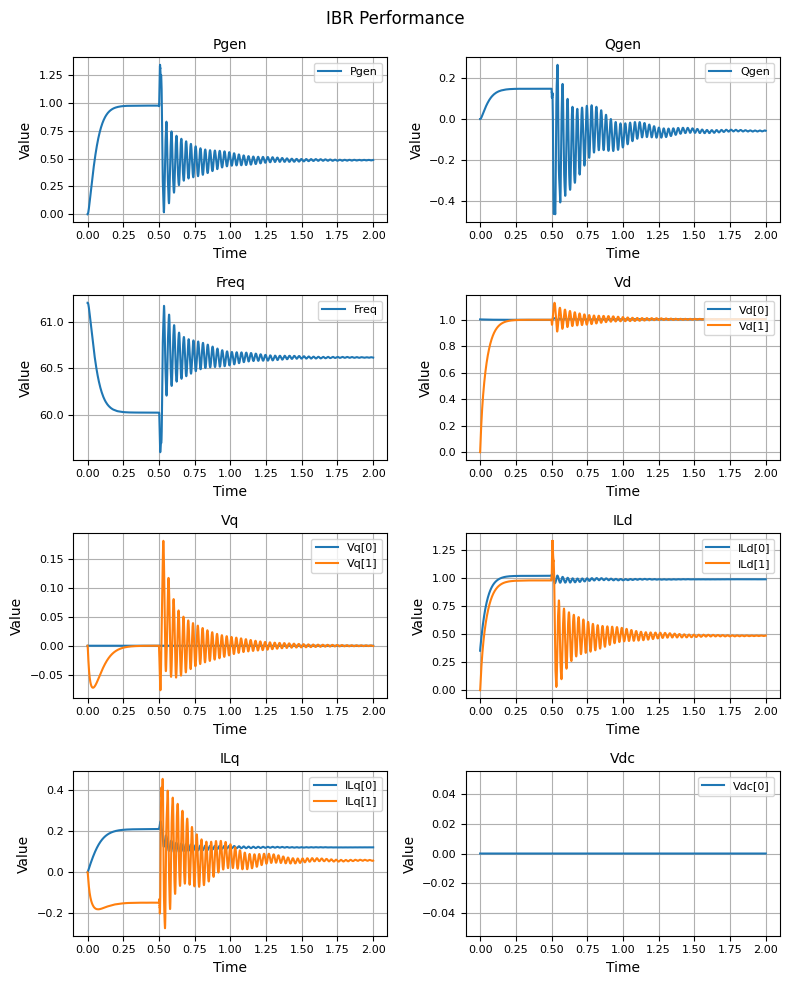

In [7]:
from SimDLL import  DasPlotter

datamap_combined = {
        "time": 0,
        "Pgen": 7,
        "Qgen": 8,
        "Freq": 9,
        "Vd": [11, 13],
        "Vq": [12, 14],
        "ILd": [15, 17 ],
        "ILq": [16, 18],
        "Vdc": [19]}

dp = DasPlotter(mode='show')

dataset = [result['out_gfm']]
dp.plot(datamap_combined, dataset, time_array, title="IBR Performance")

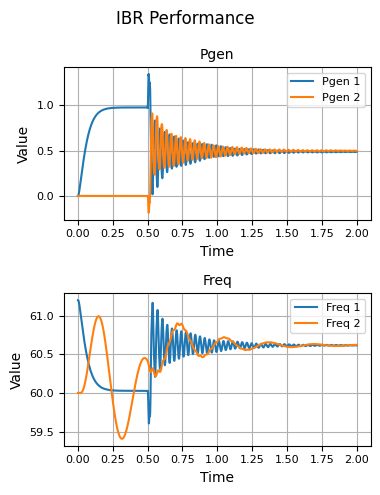

In [6]:
datamap_combined = {
        "time": 0,
        "Pgen": 7,
        "Freq": 9}

dp2 = DasPlotter(mode='save', orientation='vertical')
dataset = [result['out_gfm'], result['out_gfl']]
dp2.plot(datamap_combined, dataset, time_array, title="IBR Performance")